In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets , metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [42]:
diabetes = datasets.load_diabetes()

In [43]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [44]:
X = diabetes.data
y = diabetes.target

In [11]:
df = pd.DataFrame(X, columns= diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


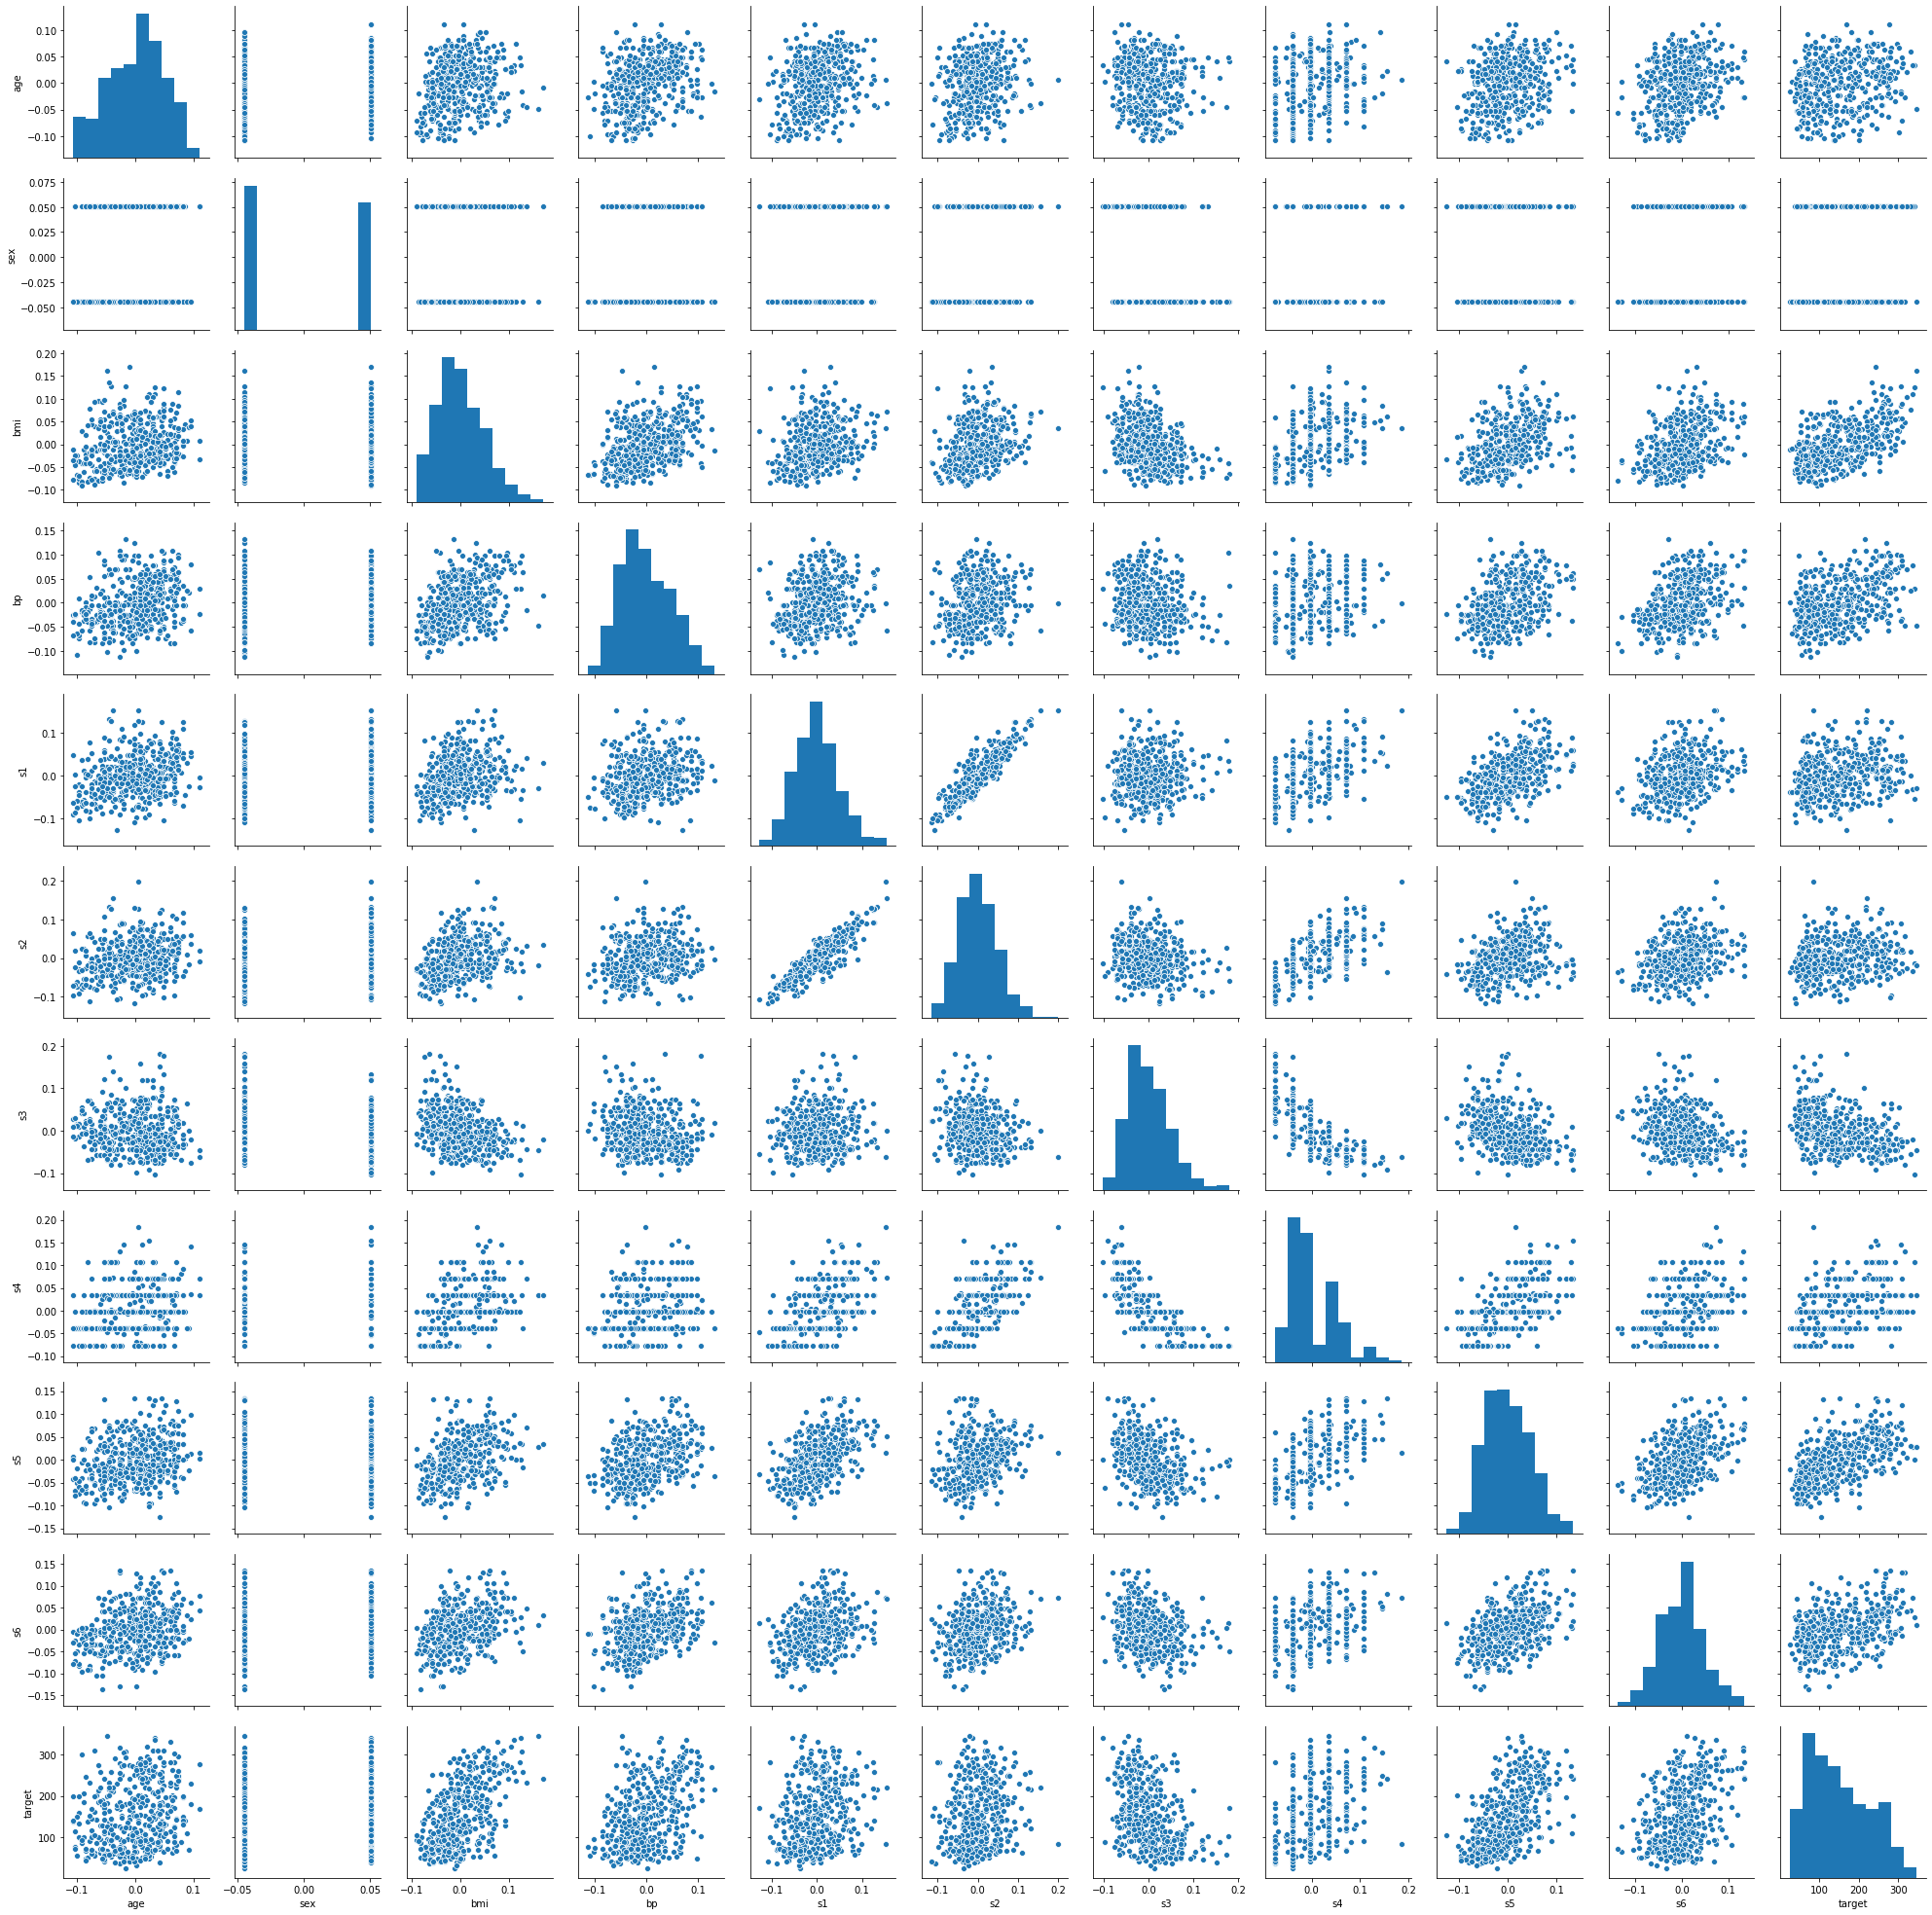

In [12]:
sns.pairplot(df)

In [16]:
X_train, X_test , y_train, y_test = train_test_split(X , y,  test_size = 0.2, random_state = 42)

In [19]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_preditc = regressor.predict(X_test)

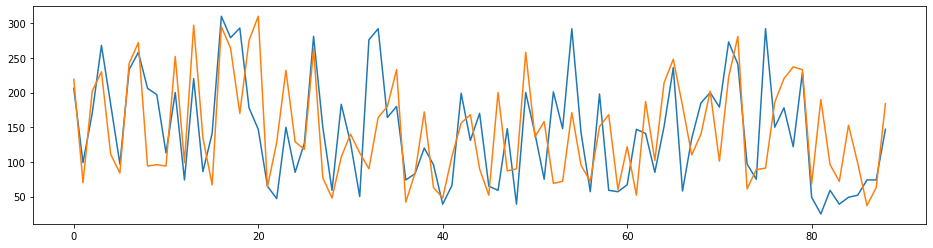

In [25]:
plt.figure(figsize =(16,4))
plt.plot(y_preditc)
plt.plot(y_test)

In [27]:
np.sqrt(metrics.mean_squared_error(y_test, y_preditc))


70.61829663921893

In [28]:
y_test.std()

72.78840394263774

In [29]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
iris = datasets.load_iris()

In [31]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns= iris.feature_names)
df['targer'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


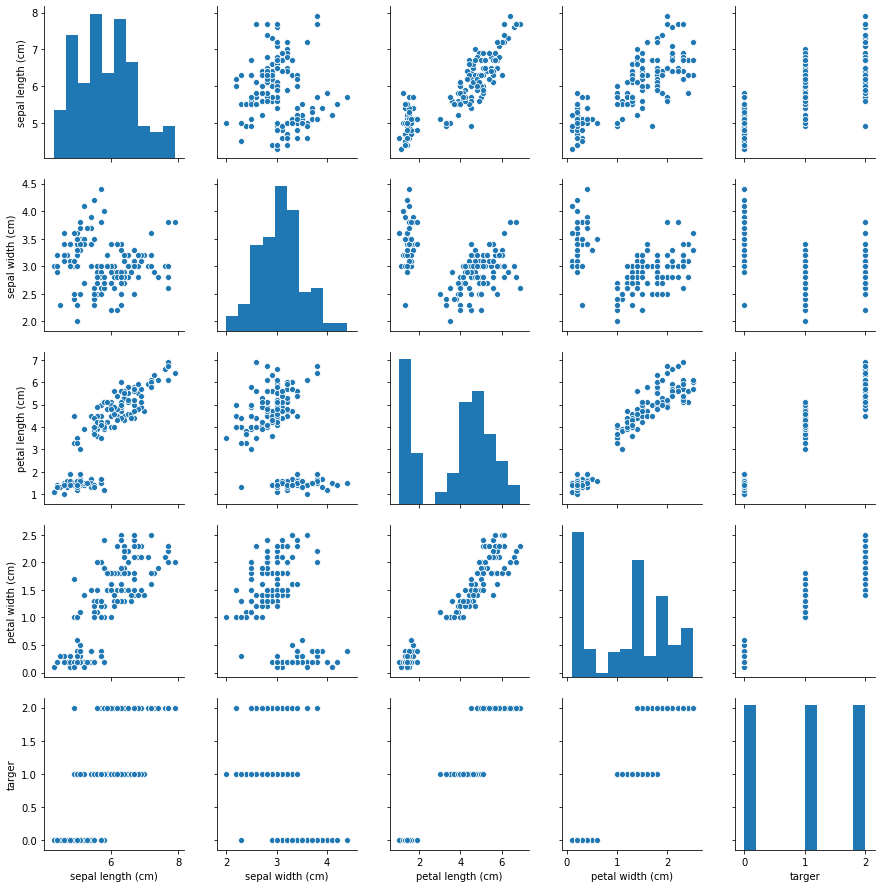

In [32]:
sns.pairplot(df)

In [33]:
X_train, X_test , y_train, y_test = train_test_split(X , y,  test_size = 0.2, random_state = 1, stratify = y)

In [34]:
clf = DecisionTreeClassifier(criterion='gini',random_state=1)

In [36]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [37]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9666666666666667


Text(91.68, 0.5, 'true')

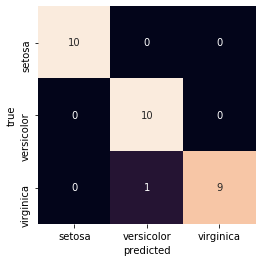

In [41]:
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("predicted")
plt.ylabel('true')